In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'pandas'

In [42]:
# Load the dataset
file_path = "Dataset.csv"
df = pd.read_csv(file_path)

In [43]:
#features (X) | target (y)
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

mean_X = X.mean()
std_X = X.std()
X_norm = (X - mean_X) / std_X

In [44]:
# bias
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]

# Initialize parameters for gradient descent
theta = np.zeros((2, 1))  # (theta0, theta1)
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
m = len(y)  # Number of training samples

In [45]:
# Cost function
def compute_cost(X, y, theta):
    predictions = X @ theta
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)

In [46]:
# Gradient Descent function
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        predictions = X @ theta
        error = predictions - y
        gradient = (1 / m) * (X.T @ error)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_final, cost_history = gradient_descent(X_norm, y, theta, alpha, iterations)
actual_slope = theta_final[1] / std_X
actual_intercept = theta_final[0] - (actual_slope * mean_X)
y_pred_gd = actual_intercept + actual_slope * X

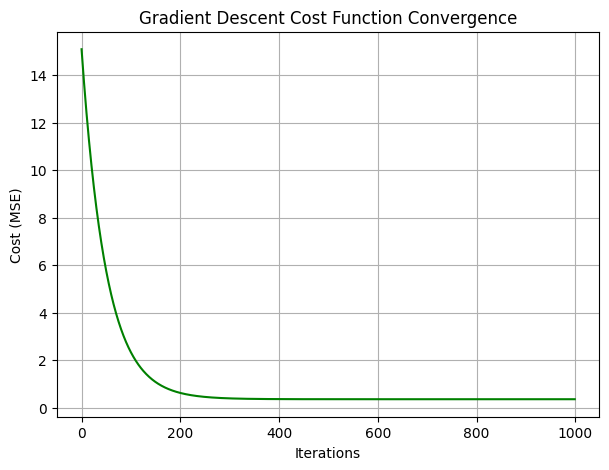

In [47]:
#Cost Function Convergence
plt.figure(figsize=(7, 5))
plt.plot(range(iterations), cost_history, color="green")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Function Convergence")
plt.grid(True)
plt.show()

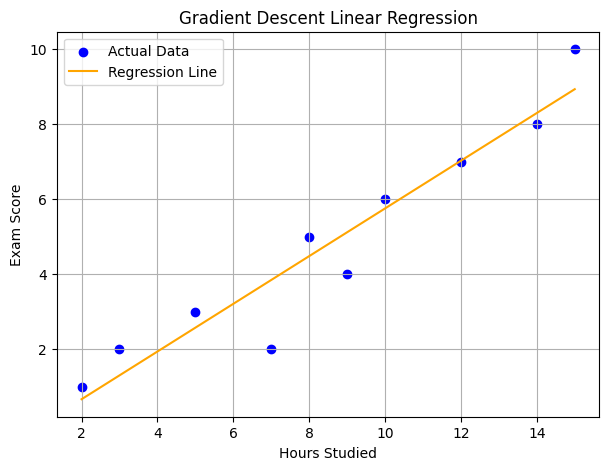

In [48]:
#Gradient Descent
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_gd, color="orange", label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Gradient Descent Linear Regression")
plt.legend()
plt.grid(True)
plt.show()